# Final project

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (10, 6)

** Experiment Overview: Free Trial Screener** 

At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

## Step 1: Choosing evaluation and invariant metrics

Metric Choice

Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.

    Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)
    
    Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)
    
    Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
    
    Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
    
    Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
    
    Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
    
    Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.

### Answer

Hypothesis behind the experiment is that by setting user expectations up-front, Udacity will reduce number of users who left free trial because of frustration without significantly affecting number of people who continue past free trial and complete the course. 


** Evaluation metrics**
* Retention - Under test hypothesis retention should improve since we’ll prevent users from registering who do not have minimum weekly time budget to allocate towards the course.
* Net conversion - It should stay stable or improve because of all visitors clicked on start free trial button, more people may continue to pay. It may decrease if click-to-checkout falls significantly.


**Invariant metrics**
* Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000) - Should not be affected.
* Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)  - Should not be affected.
* Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01) - Should not be affected.

**Experiment success: retention rate is larger by at least 0.01 p.p, while net conversion rate is not lower than 0.0075 p.p.**

However, if gross conversion drops by more than 0.0075 p.p. because of too many people decide not to enroll at all while retention rate improved in practical terms, another experiment should be launched that would try address the gross conversion rate.

### Step 2: Calculate standard deviation of evaluation metrics assuming 5000 pageviews  per day
    **Baseline values**
    Unique cookies to view course overview page per day:	40000
    Unique cookies to click "Start free trial" per day:	3200
    Enrollments per day:	660
    Click-through-probability on "Start free trial":	0.08
    Probability of enrolling, given click:	0.20625
    Probability of payment, given enroll:	0.53  <-- retention rate
    Probability of payment, given click	0.1093125 <-- net conversion rate


https://docs.google.com/spreadsheets/d/1MYNUtC47Pg8hdoCjOXaHqF-thheGpUshrFA21BAJnNc/edit#gid=0

In [2]:
# per day
n_visit_cookies = 40000
n_clicks_to_start = 3200
n_enrolls = 660
baseline_enrollment_rate = n_enrolls / n_visit_cookies
baseline_gross_conversion = n_enrolls / n_clicks_to_start

baseline_ctr = n_clicks_to_start / n_visit_cookies
baseline_retention = 0.53
baseline_net_conversion = 0.1093125

In [3]:
baseline_net_conversion

0.1093125

In [4]:
baseline_gross_conversion

0.20625

In [5]:
baseline_ctr

0.08

In [6]:
n_visit_cookies_experim = 5000 # given
n_experim_enrolls = n_visit_cookies_experim * baseline_enrollment_rate
n_experim_clicks = n_visit_cookies_experim * baseline_ctr
n_experim_clicks, n_experim_enrolls

(400.0, 82.5)

In [7]:
# https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
def binom_prop_variance(n, p):
    return p * (1 - p) / n 

sd_retention = np.sqrt(binom_prop_variance(n_experim_enrolls, baseline_retention))
sd_gross_conversion = np.sqrt(binom_prop_variance(n_experim_clicks, baseline_gross_conversion))
sd_net_conversion = np.sqrt(binom_prop_variance(n_experim_clicks, baseline_net_conversion))
sd_retention, sd_gross_conversion, sd_net_conversion

(0.054949012178509081, 0.020230604137049392, 0.01560154458248846)

### Step 3: Calculate number of pageviews

WARNING: twisted definition of pageview:
        
        Pageviews: Number of unique cookies to view the course overview page that day.

In [8]:
alpha = 0.05 
beta = 0.2

d_min_retention = 0.01
d_min_net_conversion  = 0.0075
d_min_gross_conversion = 0.01

In [9]:
baseline_retention, baseline_net_conversion, baseline_gross_conversion

(0.53, 0.1093125, 0.20625)

In [10]:
d_min_retention, d_min_net_conversion, d_min_gross_conversion

(0.01, 0.0075, 0.01)

In [11]:
sd_retention, sd_net_conversion, sd_gross_conversion

(0.054949012178509081, 0.01560154458248846, 0.020230604137049392)

In [12]:
# based on net conversion rate
group_size_clicks = 25835 # https://www.evanmiller.org/ab-testing/sample-size.html#!10.93;80;5;0.75;0
total_cookies_net_conv = round(2 * group_size_clicks / baseline_ctr)
duration_days_net_conv = total_cookies_net_conv / n_visit_cookies
print(f'Unique daily cookies: {total_cookies_net_conv}, duration (days): {np.ceil(duration_days_net_conv)}')

Unique daily cookies: 645875, duration (days): 17.0


In [13]:
# based on gross conversion rate
group_size_clicks = 27411 # https://www.evanmiller.org/ab-testing/sample-size.html#!20.625;80;5;1;0
total_cookies_gross_conv = round(2 * group_size_clicks / baseline_ctr)
duration_days_gross_conv = total_cookies_gross_conv / n_visit_cookies
print(f'Unique daily cookies: {total_cookies_gross_conv}, duration (days): {np.ceil(duration_days_gross_conv)}')

Unique daily cookies: 685275, duration (days): 18.0


In [14]:
# based on retenion
group_size_enrolls = 39115 # https://www.evanmiller.org/ab-testing/sample-size.html#!53;80;5;1;0
total_cookies = round(2 * group_size_enrolls / baseline_enrollment_rate)
duration_days = total_cookies / n_visit_cookies
print(f'Unique daily cookies: {total_cookies}, duration (days): {np.ceil(duration_days)}')

Unique daily cookies: 4741212, duration (days): 119.0


Has to dump retention as evaluation metric and replace it with gross conversion rate because of long duration.

### Step 4: Choose duration and exposure

In [15]:
exposure = 0.5 # 50% of traffic diverted to experiment
total_cookies = max(total_cookies_gross_conv, total_cookies_net_conv) 
total_cookies

685275

In [16]:
np.ceil(total_cookies_gross_conv  / n_visit_cookies / exposure)

35.0

### Step 5: Sanity checks

In [17]:
control = pd.read_csv('data/control.csv')
test = pd.read_csv('data/test.csv')

In [18]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [19]:
test.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [20]:
pageviews_total = control.Pageviews.add(test.Pageviews)
clicks_total = control.Clicks.add(test.Clicks)
binom_test_vect = np.vectorize(st.binom_test)

pvals_pageviews_prop = binom_test_vect(x=control.Pageviews, n=pageviews_total, p=0.5)
pvals_clicks_prop = binom_test_vect(x=control.Clicks, n=clicks_total, p=0.5)

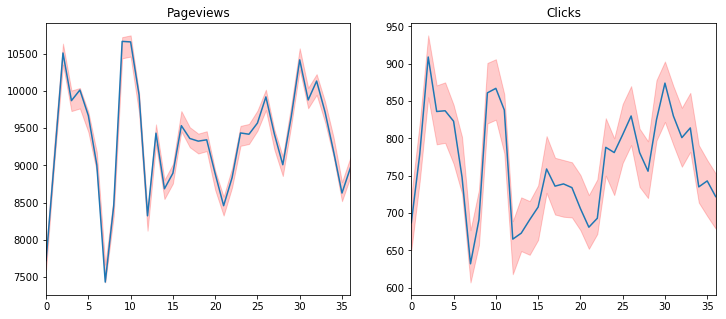

In [21]:
fig = plt.figure(figsize=(12 ,5))

fig.add_subplot(121)
control.Pageviews.plot()
_ = plt.fill_between(y1=st.binom.ppf(q=0.975, p=0.5, n=pageviews_total),
                     y2=st.binom.ppf(q=0.025, p=0.5, n=pageviews_total),
                     x=control.index, alpha=0.2, color='red')
_ = plt.title('Pageviews')

fig.add_subplot(122)
control.Clicks.plot()
_ = plt.fill_between(y1=st.binom.ppf(q=0.975, p=0.5, n=clicks_total),
                     y2=st.binom.ppf(q=0.025, p=0.5, n=clicks_total),
                     x=control.index, alpha=0.2, color='red')
_ = plt.title('Clicks')

#### Invariant metric 1: Pageviews

In [22]:
sd_null_hypoth = np.sqrt(0.5 * 0.5 / (control.Pageviews.sum() + test.Pageviews.sum()))
m = st.norm.ppf(0.975) * sd_null_hypoth
0.5 - m, 0.5 + m

(0.49882041382459419, 0.50117958617540581)

In [23]:
control.Pageviews.sum() / pageviews_total.sum()

0.50063966688061334

#### Invariant metric 2: Clicks

In [24]:
sd_null_hypoth = np.sqrt(0.5 * 0.5 / (control.Clicks.sum() + test.Clicks.sum()))
m = st.norm.ppf(0.975) * sd_null_hypoth
0.5 - m, 0.5 + m

(0.49588457134714631, 0.50411542865285364)

In [25]:
control.Clicks.sum() / clicks_total.sum()

0.50046734740666277

#### Invariant metric 3: Click-through-probability

In [26]:
ctr_control = control.Clicks.sum() / control.Pageviews.sum()
ctr_test = test.Clicks.sum() / test.Pageviews.sum()
ctr_dif = ctr_test - ctr_control
print(ctr_dif)

5.66270915869e-05


In [27]:
p_pooled = (control.Clicks.sum() + test.Clicks.sum()) / (control.Pageviews.sum() + test.Pageviews.sum())
se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1 / control.Pageviews.sum() + 1 / test.Pageviews.sum()))
error_margin = st.norm.ppf(0.975) * se_pooled
print(error_margin)

0.00129565539024


In [28]:
round(0- error_margin, 4), round(0 + error_margin, 4)

(-0.0012999999999999999, 0.0012999999999999999)

In [29]:
control.shape

(37, 5)

### Side-notes: when used pool estimate of p-hat?
https://math.stackexchange.com/questions/134339/in-what-situations-should-i-use-and-not-use-a-pooled-estimator-for-hatp

Answer: if null hypothesis assumes that true proportions are the same, then use pooled estimate.

### Step 6: Evaluation metric

In [30]:
control = control[control.Enrollments.notnull()]
test = test[test.Enrollments.notnull()]

#### Metric 1: Gross conversion rate

In [31]:
gross_conv_control = control.Enrollments.sum() / control.Clicks.sum()
gross_conv_test = test.Enrollments.sum() / test.Clicks.sum()
gross_conv_dif = gross_conv_test - gross_conv_control

gross_conv_control_daily = control.Enrollments.div(control.Clicks)
gross_conv_test_daily = test.Enrollments.div(test.Clicks)

In [32]:
gross_conv_control,  gross_conv_test, gross_conv_dif

(0.2188746891805933, 0.19831981460023174, -0.020554874580361565)

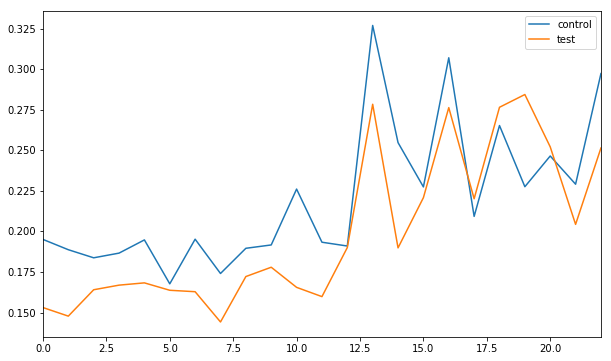

In [33]:
gross_conv_control_daily.plot(label='control')
gross_conv_test_daily.plot(label='test')
plt.legend()

In [34]:
control.Enrollments.div(control.Clicks).std(), test.Enrollments.div(test.Clicks).std()

(0.044042538470278544, 0.047450898050329579)

In [35]:
def get_se_pooled(s1, s2, n1, n2):
    p = (s1 + s2) / (n1 + n2)
    return np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))

In [36]:
se_pooled = get_se_pooled(control.Enrollments.sum(), test.Enrollments.sum(), 
                          control.Clicks.sum(), test.Clicks.sum())

In [37]:
gross_conv_dif - se_pooled * 1.96, gross_conv_dif + se_pooled * 1.96

(-0.029123358335404401, -0.01198639082531873)

Gross conversation rate is statistically different from zero and its magnitude is larger than practical significance minimum!

#### Metric 2: Net conversion rate

In [38]:
net_conv_control = control.Payments.sum() / control.Clicks.sum()
net_conv_test = test.Payments.sum() / test.Clicks.sum()
net_conv_dif = net_conv_test - net_conv_control

net_conv_control_daily = control.Payments.div(control.Clicks)
net_conv_test_daily = test.Payments.div(test.Clicks)

In [39]:
net_conv_control, net_conv_test, net_conv_dif

(0.11756201931417337, 0.1126882966396292, -0.0048737226745441675)

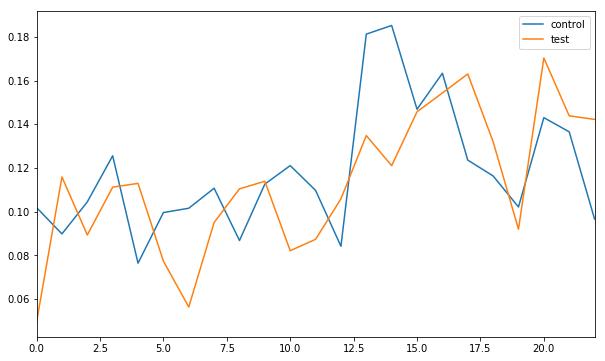

In [40]:
net_conv_control_daily.plot(label='control')
net_conv_test_daily.plot(label='test')
plt.legend()

In [41]:
control.Payments.div(control.Clicks).std(), test.Payments.div(test.Clicks).std()

(0.029405136595119761, 0.0321759709762389)

In [42]:
se_pooled = get_se_pooled(control.Payments.sum(), test.Payments.sum(), 
                          control.Clicks.sum(), test.Clicks.sum())

In [43]:
net_conv_dif - se_pooled * 1.96, net_conv_dif + se_pooled * 1.96

(-0.011604624359891718, 0.001857179010803383)

There's no statistical difference in net conversion rate between two groups; however, it's lower bound below practical significance level.

### Step 7: Sign test

In [44]:
pval_sign_gross = st.binom_test(x=sum(gross_conv_test_daily > gross_conv_control_daily), n=len(control))
pval_sign_net = st.binom_test(x=sum(net_conv_test_daily > net_conv_control_daily), n=len(control))

In [45]:
pval_sign_gross, pval_sign_net

(0.0025994777679443364, 0.67763948440551747)

Sign test agrees with findings above.

## Conclusion

Gross conversion rate fell below practical significance level, while net conversion rate is not statistically sigfnificant from zero with lower confidence interval bound below practical significance level.

Warning mechanism about insufficient time investment should be modified because current version obviously prevents too many people from enrolling that hurts gross conversionrate and  may potentially impact net conversion rate.

Possible modifications to be tested:
* lower cut-off value for minimum amount of hours per week
* notification can be shifted to second week of free trial: if during the first week factual time invested is lower than cut-off value, notify user about it so that s/he can make concious decision about cancelling or continuing with payed version.

In [46]:
# does not quite match
def total_sample_size(d_min_abs, alpha=0.05, beta=0.2):
    import scipy.stats as st
    #https://www.ncbi.nlm.nih.gov/pubmed/7273794
    z_alpha = abs(st.norm.ppf(alpha))
    z_beta = abs(st.norm.ppf(beta))
    var = 4 * 0.5 * (1 - 0.5) # maximum of pi_bar = 0.5
    return (z_alpha + z_beta) ** 2 * var / d_min_abs ** 2

In [47]:
total_sample_size(d_min_abs=0.0075) / 2

54956.064284620188

In [48]:
def get_z_star(alpha):
    """
    Return z-value at alpha quantile.
    """
    return abs(st.norm.ppf(alpha / 2))

def get_beta(z_star, d_min, se_unit, n):
    """
    Compute probability of Type-II error
    
    Parameters
    ----------
    z_start: float, z-value at alpha
    d_min: float, minimum practical difference
    se_unit: standard error at n=1
    n: suggested sample size
    
    Returns
    ----------
    beta: float, Type-II error prob
    """
    se = se_unit / np.sqrt(n)
    return st.norm.cdf(z_star * se, loc=d_min, scale=se)

def get_sample_size(d_min, se_unit, n_max=1e6, alpha=0.05, beta=0.2):
    for n in range(1, int(n_max)):
        beta_sug = get_beta(get_z_star(alpha), d_min, se_unit, n)
        if beta_sug <= beta:
            return n
    return -1

In [49]:
get_sample_size(d_min=0.02, se_unit=0.00515 * np.sqrt(5000))

2603

In [50]:
get_sample_size(d_min=0.02, se_unit=0.0119*np.sqrt(5000))

13894

In [51]:
total_sample_size(d_min_abs=0.0075) / 2

54956.064284620188

In [52]:
total_sample_size(d_min_abs=0.02)

15456.393080049425

In [53]:
get_sample_size(d_min=0.02, se_unit=0.5*2)

19623